## Taller 2 Corte Big Data - Jose Escobar - Camilo Hernandez

### Importes y esquema de los datos.

In [2]:
import numpy as np
import pandas as pd
from pyspark.sql import Window
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from matplotlib import pyplot as plt
import os

os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
spark = SparkSession.builder.appName('abc').getOrCreate()


In [3]:
df_EC = spark.read.option("inferSchema","true").csv("EC*",header=True)
df_AVH = spark.read.option("inferSchema","true").csv("AVH*",header=True)
df_AVAL = spark.read.option("inferSchema","true").csv("AVAL*",header=True)


In [3]:
split_col = F.split(df_EC['Date'], '-')
df_EC = df_EC.withColumn('Year', split_col.getItem(0))
df_EC = df_EC.withColumn('Month', split_col.getItem(1))
df_EC = df_EC.withColumn('Day0', split_col.getItem(2))
split_col = F.split(df_EC['Day0'], ' ')
df_EC = df_EC.withColumn('Day', split_col.getItem(0))
df_EC = df_EC.select([c for c in df_EC.columns if c not in {'Day0'}])


In [4]:
split_col = F.split(df_AVH['Date'], '-')
df_AVH = df_AVH.withColumn('Year', split_col.getItem(0))
df_AVH = df_AVH.withColumn('Month', split_col.getItem(1))
df_AVH = df_AVH.withColumn('Day0', split_col.getItem(2))
split_col = F.split(df_AVH['Day0'], ' ')
df_AVH = df_AVH.withColumn('Day', split_col.getItem(0))
df_AVH = df_AVH.select([c for c in df_AVH.columns if c not in {'Day0'}])


In [5]:
split_col = F.split(df_AVAL['Date'], '-')
df_AVAL = df_AVAL.withColumn('Year', split_col.getItem(0))
df_AVAL = df_AVAL.withColumn('Month', split_col.getItem(1))
df_AVAL = df_AVAL.withColumn('Day0', split_col.getItem(2))
split_col = F.split(df_AVAL['Day0'], ' ')
df_AVAL = df_AVAL.withColumn('Day', split_col.getItem(0))
df_AVAL = df_AVAL.select([c for c in df_AVAL.columns if c not in {'Day0'}])


In [6]:
df_EC.printSchema()
df_AVH.printSchema()
df_AVAL.printSchema()


root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: inte

### Punto 2.

In [7]:
df1 = df_EC.groupby('Year','Month','Day').agg(F.sum('Open').alias('sum_Open'))
df2 = df_EC.groupby('Year','Month','Day').agg(F.sum('Close').alias('sum_Close'))
df3 = df1.join(df2, ['Year','Month','Day'])
df4 = df3.withColumn('Return percentage Ecopetrol', (((df3['sum_Close'] - df3['sum_Open']) / df3['sum_Open'] )* 100))
df4.orderBy('Year','Month','Day').show(4)

df5 = df_AVH.groupby('Year','Month','Day').agg(F.sum('Open').alias('sum_Open'))
df6 = df_AVH.groupby('Year','Month','Day').agg(F.sum('Close').alias('sum_Close'))
df7 = df5.join(df6, ['Year','Month','Day'])
df8 = df7.withColumn('Return percentage Avianca', (((df7['sum_Close'] - df7['sum_Open']) / df7['sum_Open'] )* 100))
df8.orderBy('Year','Month','Day').show(4)

df9 = df_AVAL.groupby('Year','Month','Day').agg(F.sum('Open').alias('sum_Open'))
df10 = df_AVAL.groupby('Year','Month','Day').agg(F.sum('Close').alias('sum_Close'))
df12 = df9.join(df10, ['Year','Month','Day'])
df13 = df12.withColumn('Return percentage Aval', (((df12['sum_Close'] - df12['sum_Open']) / df12['sum_Open'] )* 100))
df13.orderBy('Year','Month','Day').show(4)


+----+-----+---+---------+---------+---------------------------+
|Year|Month|Day| sum_Open|sum_Close|Return percentage Ecopetrol|
+----+-----+---+---------+---------+---------------------------+
|2018|   10| 08|    26.34|    26.24|       -0.37965072133637595|
|2018|   10| 09|    26.34|    26.74|         1.5186028853454767|
|2018|   10| 10|    26.73|25.690001|         -3.890755705200156|
|2018|   10| 11|25.309999|    25.15|        -0.6321572750753671|
+----+-----+---+---------+---------+---------------------------+
only showing top 4 rows

+----+-----+---+--------+---------+-------------------------+
|Year|Month|Day|sum_Open|sum_Close|Return percentage Avianca|
+----+-----+---+--------+---------+-------------------------+
|2018|   10| 08|    5.61|     5.71|       1.7825311942958937|
|2018|   10| 09|    5.73|     5.73|                      0.0|
|2018|   10| 10|    5.75|      5.5|      -4.3478260869565215|
|2018|   10| 11|    5.42|     5.32|      -1.8450184501844953|
+----+-----+---+-----

### Punto 3.

In [8]:
df14 = df4.groupby('Year','Month').agg(F.avg('Return percentage Ecopetrol').alias('Return percentage Ecopetrol')).orderBy('Year','Month')
df15 = df8.groupby('Year','Month').agg(F.avg('Return percentage Avianca').alias('Return percentage Avianca')).orderBy('Year','Month')
df16 = df13.groupby('Year','Month').agg(F.avg('Return percentage Aval').alias('Return percentage Aval')).orderBy('Year','Month')
df14.show(4)
df15.show(4)
df16.show(4)

+----+-----+---------------------------+
|Year|Month|Return percentage Ecopetrol|
+----+-----+---------------------------+
|2018|   10|        -0.7225919882832803|
|2018|   11|        -0.8896312516430291|
|2018|   12|        -0.9766423294363787|
|2019|   01|         0.8345324145987951|
+----+-----+---------------------------+
only showing top 4 rows

+----+-----+-------------------------+
|Year|Month|Return percentage Avianca|
+----+-----+-------------------------+
|2018|   10|      -0.5216066832614145|
|2018|   11|      -0.1491291154347288|
|2018|   12|      -1.3011778973839216|
|2019|   01|       0.5716433302845223|
+----+-----+-------------------------+
only showing top 4 rows

+----+-----+----------------------+
|Year|Month|Return percentage Aval|
+----+-----+----------------------+
|2018|   10|  -0.35111906596357745|
|2018|   11|   -0.5244295776045307|
|2018|   12|  -0.28194349470444247|
|2019|   01|    0.6935531603015825|
+----+-----+----------------------+
only showing top 4 row

### Punto 4.

In [9]:
df14.orderBy(col('Return percentage Ecopetrol').desc()).show(1)
df15.orderBy(col('Return percentage Avianca').desc()).show(1)
df16.orderBy(col('Return percentage Aval').desc()).show(1)


+----+-----+---------------------------+
|Year|Month|Return percentage Ecopetrol|
+----+-----+---------------------------+
|2019|   01|         0.8345324145987951|
+----+-----+---------------------------+
only showing top 1 row

+----+-----+-------------------------+
|Year|Month|Return percentage Avianca|
+----+-----+-------------------------+
|2019|   09|       1.9319945949403283|
+----+-----+-------------------------+
only showing top 1 row

+----+-----+----------------------+
|Year|Month|Return percentage Aval|
+----+-----+----------------------+
|2019|   02|    0.7474968309597119|
+----+-----+----------------------+
only showing top 1 row



### Punto 5.

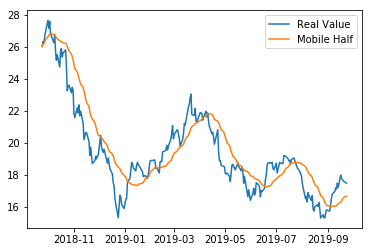

In [6]:
window1 = Window.orderBy(df_EC.Date).rowsBetween(-20,0)
df17 = df_EC.select('Date', F.avg('Close').over(window1).alias('Average'))
fig, ax = plt.subplots()
EC_pd = df_EC.toPandas()
EC_AVG = df17.toPandas()
EC_pd.set_index("Date")
EC_AVG.set_index("Date")
ax.plot(EC_pd.Date, EC_pd.Close, label="Real Value")
ax.plot(EC_AVG.Date, EC_AVG.Average, label="Mobile Half")
ax.legend()


### Punto 6.

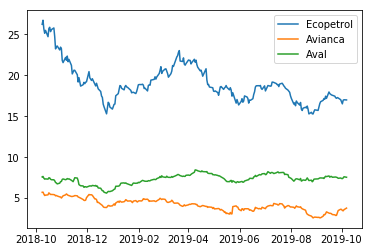

In [11]:
df18 = df_EC.select('Date', 'Close')
df19 = df_AVH.select('Date', 'Close')
df20 = df_AVAL.select('Date', 'Close')
EC_pd = df18.toPandas()
AVH_pd = df19.toPandas()
AVAL_pd = df20.toPandas()
fig, ax = plt.subplots()
ax.plot(EC_pd.Date, EC_pd.Close, label="Ecopetrol")
ax.plot(AVH_pd.Date, AVH_pd.Close, label="Avianca")
ax.plot(AVAL_pd.Date, AVAL_pd.Close, label="Aval")
ax.legend()

### Punto 7.

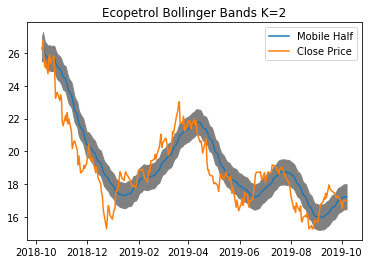

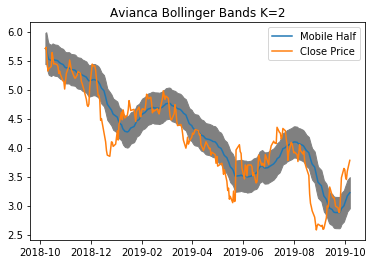

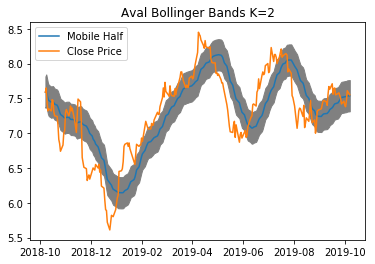

In [12]:
window2 = Window.orderBy(df_EC.Date).rowsBetween(-20,0)
df21 = df_EC.select('Date', F.avg('Close').over(window2).alias('Average'))
df22 = df_EC.orderBy(df_EC.Date).select('Close')
df23 = df_EC.orderBy(df_EC.Date).select('Open')
EC_Mobile_Half = df21.toPandas()
EC_Close_Prices = df22.toPandas()
EC_Open_Prices = df23.toPandas()
EC_pd = df_EC.toPandas()
EC_Standar_Desviation = np.std(np.array(EC_Close_Prices) - np.array(EC_Open_Prices))
EC_Upper_Band = (EC_Mobile_Half.Average) + (EC_Standar_Desviation *2)
EC_Lower_Band = (EC_Mobile_Half.Average) - (EC_Standar_Desviation *2)
fig, ax = plt.subplots()
ax.fill_between(EC_Mobile_Half.Date, EC_Upper_Band, EC_Lower_Band, color='grey')
ax.plot(EC_Mobile_Half.Date, EC_Mobile_Half.Average, label="Mobile Half")
ax.plot(EC_pd.Date, EC_pd.Close, label="Close Price")
ax.set_title('Ecopetrol Bollinger Bands K=2')
ax.legend()

window3 = Window.orderBy(df_AVH.Date).rowsBetween(-20,0)
df24 = df_AVH.select('Date', F.avg('Close').over(window3).alias('Average'))
df25 = df_AVH.orderBy(df_AVH.Date).select('Close')
df26 = df_AVH.orderBy(df_AVH.Date).select('Open')
AVH_Mobile_Half = df24.toPandas()
AVH_Close_Prices = df25.toPandas()
AVH_Open_Prices = df26.toPandas()
AVH_pd = df_AVH.toPandas()
AVH_Standar_Desviation = np.std(np.array(AVH_Close_Prices) - np.array(AVH_Open_Prices))
AVH_Upper_Band = (AVH_Mobile_Half.Average) + (AVH_Standar_Desviation *2)
AVH_Lower_Band = (AVH_Mobile_Half.Average) - (AVH_Standar_Desviation *2)
fig, ax = plt.subplots()
ax.fill_between(AVH_Mobile_Half.Date, AVH_Upper_Band, AVH_Lower_Band, color='grey')
ax.plot(AVH_Mobile_Half.Date, AVH_Mobile_Half.Average, label="Mobile Half")
ax.plot(AVH_pd.Date, AVH_pd.Close, label="Close Price")
ax.set_title('Avianca Bollinger Bands K=2')
ax.legend()

window4 = Window.orderBy(df_AVAL.Date).rowsBetween(-20,0)
df27 = df_AVAL.select('Date', F.avg('Close').over(window4).alias('Average'))
df28 = df_AVAL.orderBy(df_AVAL.Date).select('Close')
df29 = df_AVAL.orderBy(df_AVAL.Date).select('Open')
AVAL_Mobile_Half = df27.toPandas()
AVAL_Close_Prices = df28.toPandas()
AVAL_Open_Prices = df29.toPandas()
AVAL_pd = df_AVAL.toPandas()
AVAL_Standar_Desviation = np.std(np.array(AVAL_Close_Prices) - np.array(AVAL_Open_Prices))
AVAL_Upper_Band = (AVAL_Mobile_Half.Average) + (AVAL_Standar_Desviation *2)
AVAL_Lower_Band = (AVAL_Mobile_Half.Average) - (AVAL_Standar_Desviation *2)
fig, ax = plt.subplots()
ax.fill_between(AVAL_Mobile_Half.Date, AVAL_Upper_Band, AVAL_Lower_Band, color='grey')
ax.plot(AVAL_Mobile_Half.Date, AVAL_Mobile_Half.Average, label="Mobile Half")
ax.plot(AVAL_pd.Date, AVAL_pd.Close, label="Close Price")
ax.set_title('Aval Bollinger Bands K=2')
ax.legend()


### Punto 8.

### Punto 9.

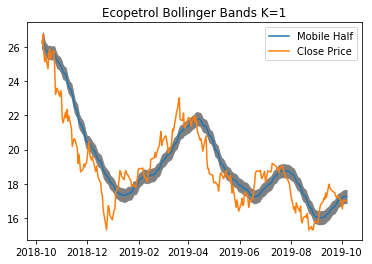

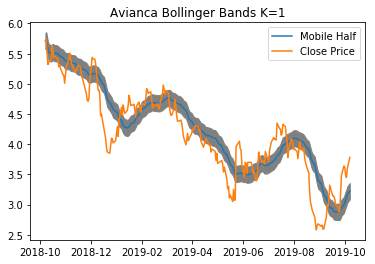

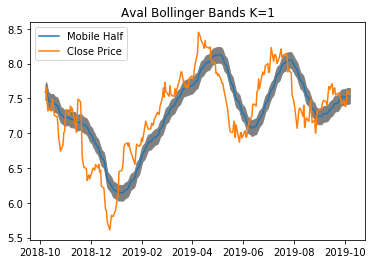

In [16]:
#Valores con K=2 en el punto 7.

window2 = Window.orderBy(df_EC.Date).rowsBetween(-20,0)
df21 = df_EC.select('Date', F.avg('Close').over(window2).alias('Average'))
df22 = df_EC.orderBy(df_EC.Date).select('Close')
df23 = df_EC.orderBy(df_EC.Date).select('Open')
EC_Mobile_Half = df21.toPandas()
EC_Close_Prices = df22.toPandas()
EC_Open_Prices = df23.toPandas()
EC_pd = df_EC.toPandas()
EC_Standar_Desviation = np.std(np.array(EC_Close_Prices) - np.array(EC_Open_Prices))
EC_Upper_Band = (EC_Mobile_Half.Average) + (EC_Standar_Desviation *1)
EC_Lower_Band = (EC_Mobile_Half.Average) - (EC_Standar_Desviation *1)
fig, ax = plt.subplots()
ax.fill_between(EC_Mobile_Half.Date, EC_Upper_Band, EC_Lower_Band, color='grey')
ax.plot(EC_Mobile_Half.Date, EC_Mobile_Half.Average, label="Mobile Half")
ax.plot(EC_pd.Date, EC_pd.Close, label="Close Price")
ax.set_title('Ecopetrol Bollinger Bands K=1')
ax.legend()

window3 = Window.orderBy(df_AVH.Date).rowsBetween(-20,0)
df24 = df_AVH.select('Date', F.avg('Close').over(window3).alias('Average'))
df25 = df_AVH.orderBy(df_AVH.Date).select('Close')
df26 = df_AVH.orderBy(df_AVH.Date).select('Open')
AVH_Mobile_Half = df24.toPandas()
AVH_Close_Prices = df25.toPandas()
AVH_Open_Prices = df26.toPandas()
AVH_pd = df_AVH.toPandas()
AVH_Standar_Desviation = np.std(np.array(AVH_Close_Prices) - np.array(AVH_Open_Prices))
AVH_Upper_Band = (AVH_Mobile_Half.Average) + (AVH_Standar_Desviation *1)
AVH_Lower_Band = (AVH_Mobile_Half.Average) - (AVH_Standar_Desviation *1)
fig, ax = plt.subplots()
ax.fill_between(AVH_Mobile_Half.Date, AVH_Upper_Band, AVH_Lower_Band, color='grey')
ax.plot(AVH_Mobile_Half.Date, AVH_Mobile_Half.Average, label="Mobile Half")
ax.plot(AVH_pd.Date, AVH_pd.Close, label="Close Price")
ax.set_title('Avianca Bollinger Bands K=1')
ax.legend()

window4 = Window.orderBy(df_AVAL.Date).rowsBetween(-20,0)
df27 = df_AVAL.select('Date', F.avg('Close').over(window4).alias('Average'))
df28 = df_AVAL.orderBy(df_AVAL.Date).select('Close')
df29 = df_AVAL.orderBy(df_AVAL.Date).select('Open')
AVAL_Mobile_Half = df27.toPandas()
AVAL_Close_Prices = df28.toPandas()
AVAL_Open_Prices = df29.toPandas()
AVAL_pd = df_AVAL.toPandas()
AVAL_Standar_Desviation = np.std(np.array(AVAL_Close_Prices) - np.array(AVAL_Open_Prices))
AVAL_Upper_Band = (AVAL_Mobile_Half.Average) + (AVAL_Standar_Desviation *1)
AVAL_Lower_Band = (AVAL_Mobile_Half.Average) - (AVAL_Standar_Desviation *1)
fig, ax = plt.subplots()
ax.fill_between(AVAL_Mobile_Half.Date, AVAL_Upper_Band, AVAL_Lower_Band, color='grey')
ax.plot(AVAL_Mobile_Half.Date, AVAL_Mobile_Half.Average, label="Mobile Half")
ax.plot(AVAL_pd.Date, AVAL_pd.Close, label="Close Price")
ax.set_title('Aval Bollinger Bands K=1')
ax.legend()


### Punto 10.

In [23]:
window2 = Window.orderBy(df_EC.Date).rowsBetween(-20,0)
df21 = df_EC.select('Date','Close', F.avg('Close').over(window2).alias('Average'))
df21 = df21[df21['Close'] > df21['Average']].orderBy('Date').show()

+-------------------+---------+------------------+
|               Date|    Close|           Average|
+-------------------+---------+------------------+
|2018-10-09 00:00:00|    26.74|             26.49|
|2018-10-16 00:00:00|25.719999| 25.68142857142857|
|2018-10-17 00:00:00|25.879999|25.706249874999997|
|2018-10-22 00:00:00|25.799999|         25.671818|
|2018-12-03 00:00:00|20.459999|20.388571380952378|
|2019-01-07 00:00:00|    17.77|17.476190380952378|
|2019-01-08 00:00:00|18.280001|17.423809523809524|
|2019-01-09 00:00:00|    18.76| 17.38428571428571|
|2019-01-10 00:00:00|18.690001| 17.37285719047619|
|2019-01-11 00:00:00|    18.42| 17.35904771428572|
|2019-01-14 00:00:00|    18.23| 17.32047623809524|
|2019-01-15 00:00:00|18.620001| 17.31714290476191|
|2019-01-16 00:00:00|    18.77| 17.33666666666667|
|2019-01-17 00:00:00|    18.59|17.363333285714287|
|2019-01-18 00:00:00|18.549999|17.414285619047618|
|2019-01-22 00:00:00|    18.17|17.455238047619048|
|2019-01-23 00:00:00|17.870001|

### Punto 11.

In [25]:
window2 = Window.orderBy(df_EC.Date).rowsBetween(-20,0)
df21 = df_EC.select('Date','Close', F.avg('Close').over(window2).alias('Average'))
df21 = df21[df21['Close'] <= df21['Average']].orderBy('Date').show()

+-------------------+---------+------------------+
|               Date|    Close|           Average|
+-------------------+---------+------------------+
|2018-10-08 00:00:00|    26.24|             26.24|
|2018-10-10 00:00:00|25.690001|26.223333666666665|
|2018-10-11 00:00:00|    25.15|25.955000249999998|
|2018-10-12 00:00:00|     25.5|        25.8640002|
|2018-10-15 00:00:00|    24.73|25.675000166666663|
|2018-10-18 00:00:00|    25.35| 25.66666655555555|
|2018-10-19 00:00:00|    25.59|25.658999899999998|
|2018-10-23 00:00:00|    24.74|        25.5941665|
|2018-10-24 00:00:00|    23.24| 25.41307676923077|
|2018-10-25 00:00:00|    23.52|         25.277857|
|2018-10-26 00:00:00|    23.59|        25.1653332|
|2018-10-29 00:00:00|23.110001|     25.0368749375|
|2018-10-30 00:00:00|23.450001|24.943529411764704|
|2018-10-31 00:00:00|    23.26|24.849999999999998|
|2018-11-01 00:00:00|    21.83|24.691052631578945|
|2018-11-02 00:00:00|21.559999|24.534499949999997|
|2018-11-05 00:00:00|22.190001|